# Линейный МНК для эксперементальных данных

In [543]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Подготовка данных

In [544]:
data_base_path = "SOCR-HeightWeight.csv"

In [545]:
df = pd.read_csv(data_base_path)[:100]
df.drop("Index", axis=1, inplace=True)

display(df)

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
95,70.55703,131.8001
96,66.28644,120.0285
97,63.42577,123.0972
98,66.76711,128.1432


Возьмем 7 значений наименее зашемленных:

In [546]:
df['bin'] = pd.qcut(df["Weight(Pounds)"], q=10, duplicates='drop')
display(df)


,Height(Inches),Weight(Pounds),bin
0,65.78331,112.9925,"(112.93, 120.245]"
1,71.51521,136.4873,"(132.832, 136.505]"
2,69.39874,153.0269,"(142.519, 155.899]"
3,68.21660,142.3354,"(140.44, 142.519]"
4,67.78781,144.2971,"(142.519, 155.899]"
...,...,...,...
95,70.55703,131.8001,"(129.408, 132.832]"
96,66.28644,120.0285,"(112.93, 120.245]"
97,63.42577,123.0972,"(120.245, 123.433]"
98,66.76711,128.1432,"(127.825, 129.408]"


In [547]:
df_smooth = df.groupby('bin').agg({
    "Weight(Pounds)": "mean",
    "Height(Inches)": "mean"
}).reset_index(drop=True)

display(df_smooth)

/var/folders/8k/67hlyrt568x_jpdg397vh5sw0000gp/T/ipykernel_12318/1215649879.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_smooth = df.groupby('bin').agg({


,Weight(Pounds),Height(Inches)
0,106.318481,66.639238
1,116.013950,67.518691
2,121.735900,67.053793
3,125.214620,67.384825
4,128.716470,67.370221
5,130.904120,68.230300
6,134.829320,69.457822
7,138.760920,69.630310
8,141.664230,68.928008
9,147.933160,69.197358


In [548]:
X_smooth = df_smooth["Height(Inches)"]
Y_smooth = df_smooth["Weight(Pounds)"]


Гладкая функция:

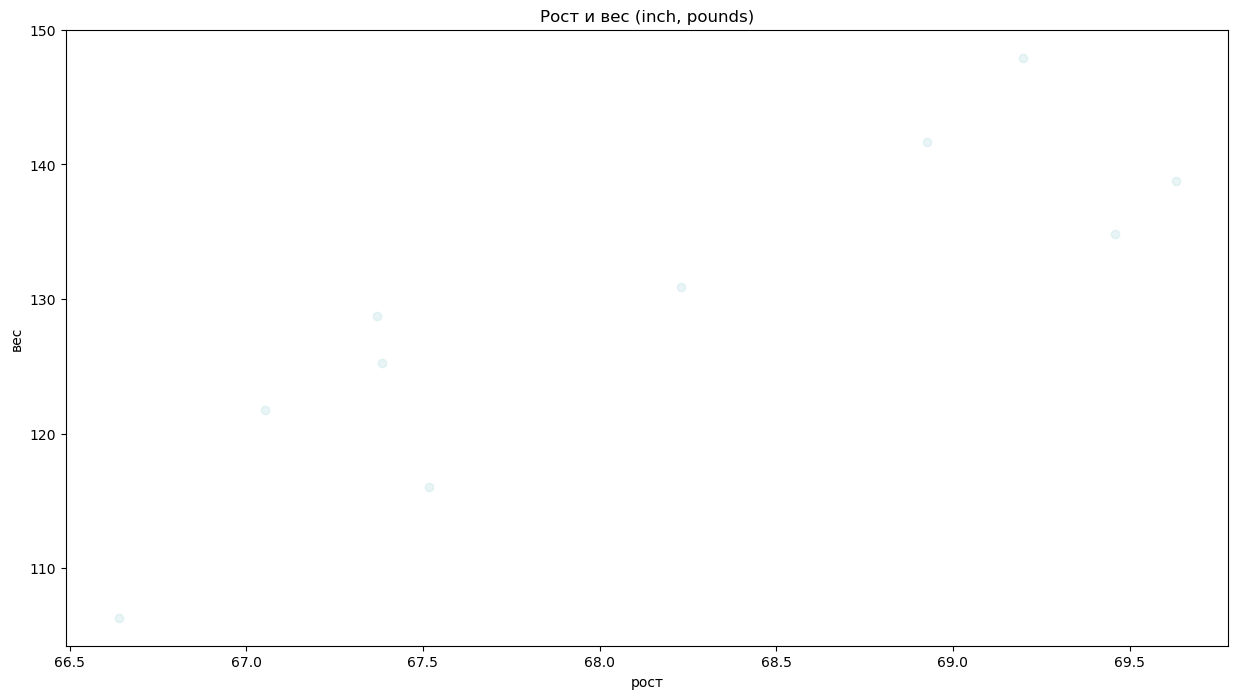

In [549]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=X_smooth, y=Y_smooth, alpha=0.4, color="#c6e4e7")

ax.set_xlabel("рост")
ax.set_ylabel("вес")
ax.set_title("Рост и вес (inch, pounds)")
plt.show()

Нахождение Wo* и W1*:

In [550]:
def get_coef(x, y):
    size = len(x)
    A = np.empty((2, 2))
    A[[0], [0]] = sum((x[i])**2 for i in range(0,size))
    A[[0], [1]] = sum(x)
    A[[1], [0]] = sum(x)
    A[[1], [1]] = size
    
    A = np.linalg.inv(A)    # обратная матрица
 
    B = np.empty((2, 1))
    B[0] = sum((x[i]*y[i]) for i in range(0,size))
    B[1] = sum((y[i]) for i in range(0,size))
    
    # умножаем матрицу на вектор
    ww = np.dot(A, B)
    return ww[1], ww[0]

w0, w1 = get_coef(X_smooth, Y_smooth)
print(f"Wo = {w0}     W1 = {w1}")

Wo = [-543.36565717]     W1 = [9.87033087]


y_approx = W0 + W1*Xi

In [551]:
y_approx_smooth = w0 + w1*X_smooth
print(y_approx_smooth)

0    114.385671
1    123.066163
2    118.477466
3    121.744861
4    121.600715
5    130.089979
6    142.206027
7    143.908541
8    136.976588
9    139.635161
Name: Height(Inches), dtype: float64


## МНК без шума (линейная модель)

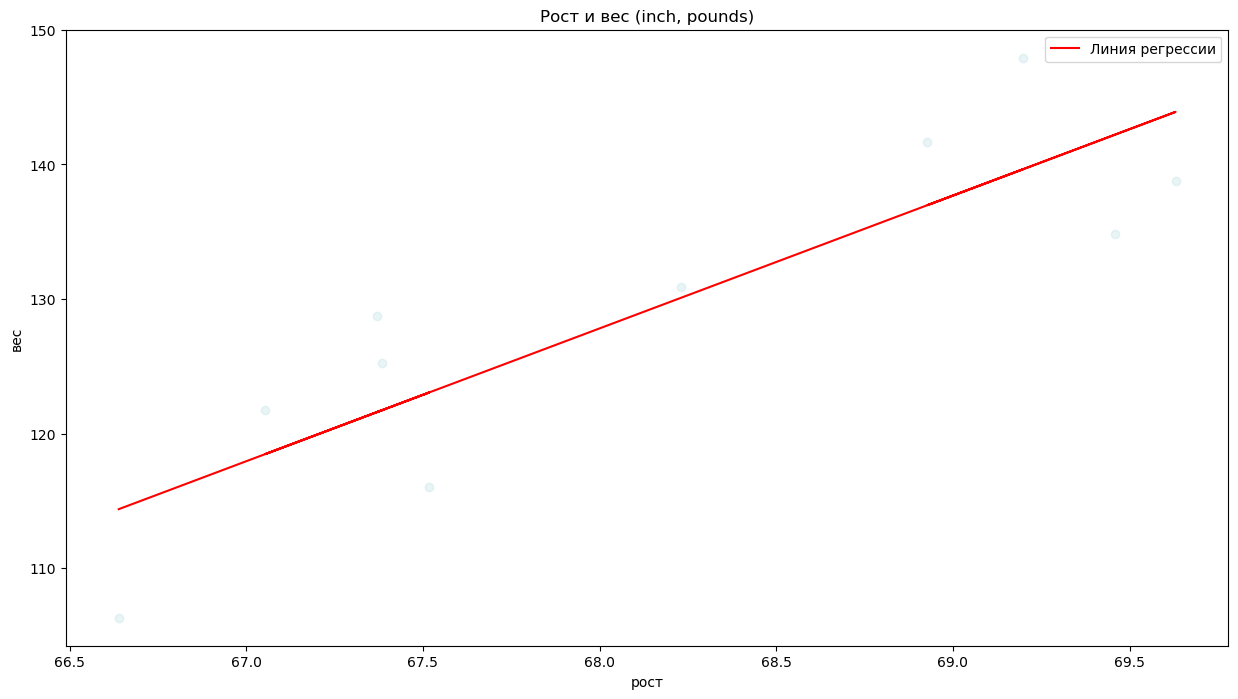

In [552]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=X_smooth, y=Y_smooth, alpha=0.4, color="#c6e4e7")

ax.plot(X_smooth, y_approx_smooth, color='red', label=f'Линия регрессии')

ax.set_xlabel("рост")
ax.set_ylabel("вес")
ax.set_title("Рост и вес (inch, pounds)")
ax.legend()
plt.show()

## МНК линейного типа на реальных данных

Wo = [-110.21167261]     W1 = [3.51360548]


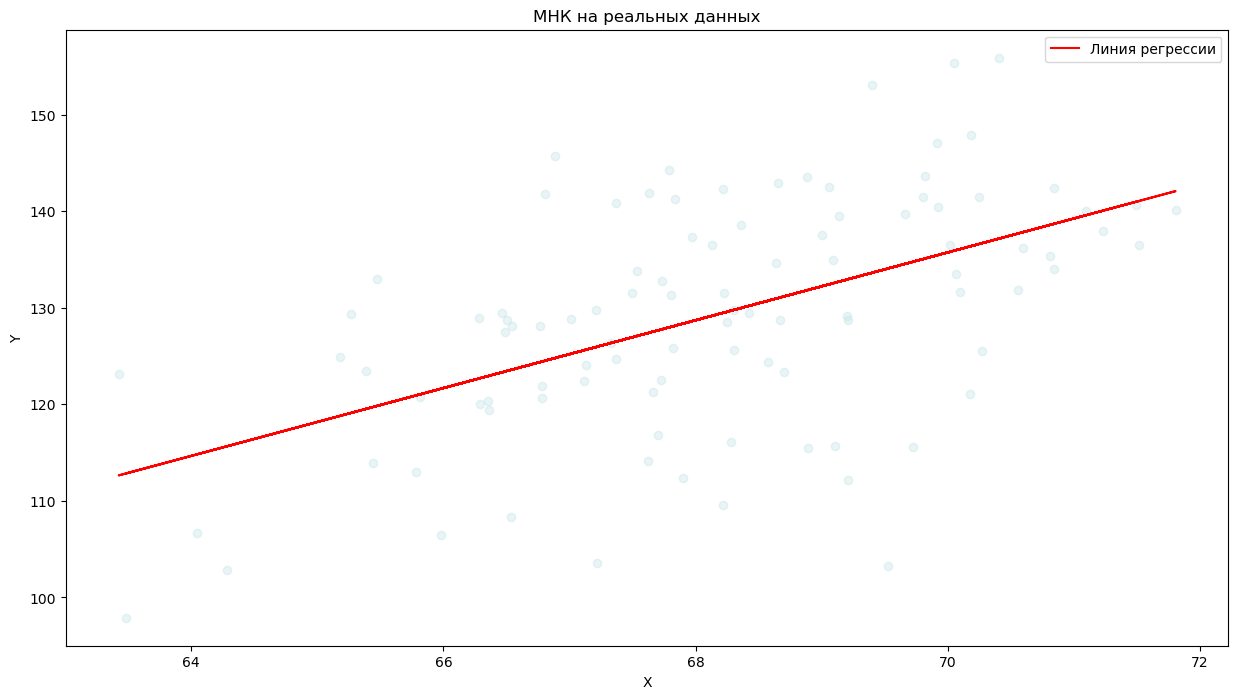

In [553]:
X = df["Height(Inches)"]
Y = df["Weight(Pounds)"]

w0, w1 = get_coef(X, Y)
print(f"Wo = {w0}     W1 = {w1}")

y_approx = w0 + w1*X


fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=X, y=Y, alpha=0.4, color="#c6e4e7")
ax.plot(X, y_approx, color="red", label="Линия регрессии")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("МНК на реальных данных")
ax.legend()
plt.show()

## МНК без шума для sin(x)

In [554]:
X_sin = np.linspace(0, 2* np.pi, 31)
Y_sin = np.sin(X_sin)


Wo = [0.86319839]     W1 = [-0.27476458]


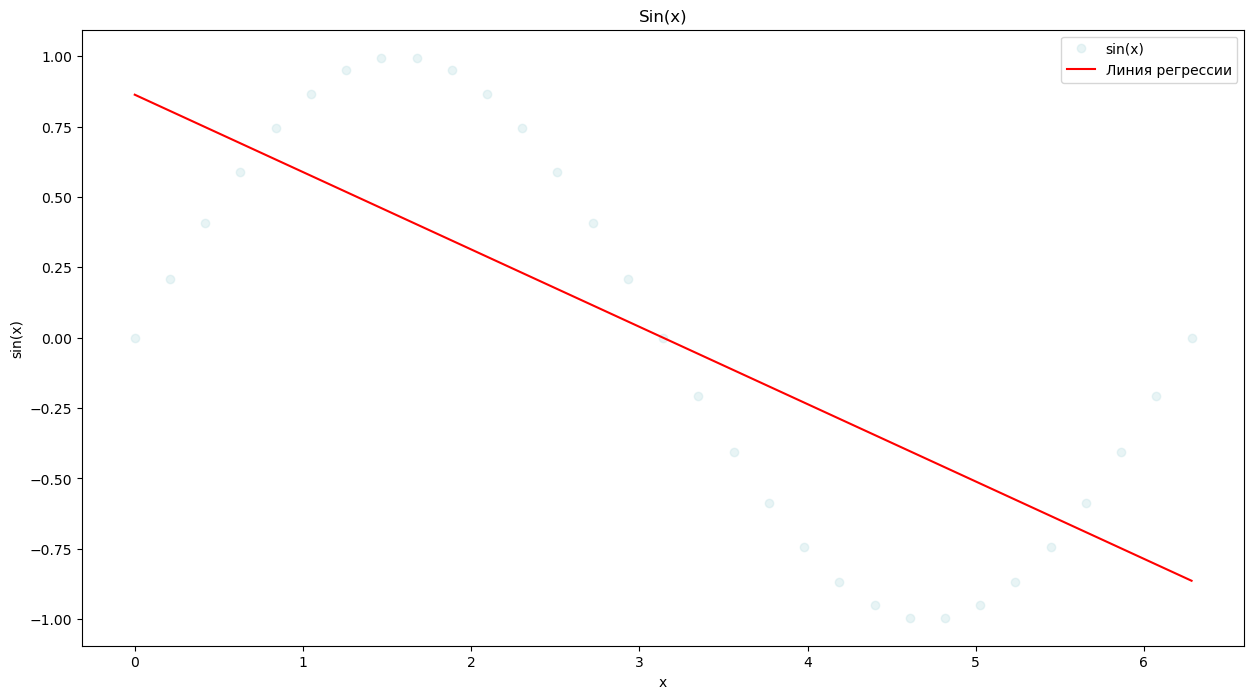

In [555]:
# МНК

w0, w1 = get_coef(X_sin, Y_sin)
print(f"Wo = {w0}     W1 = {w1}")

y_approx_sin = w0 + w1*X_sin


fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(X_sin, Y_sin, "o", alpha=0.4, color="#c6e4e7", label="sin(x)")
ax.plot(X_sin, y_approx_sin, color="red", label="Линия регрессии")

ax.set_ylabel("sin(x)")
ax.set_xlabel("x")
ax.set_title("Sin(x)")
ax.legend()
plt.show()


## МНК полинома степени n

In [556]:
def get_all_coef(x, y, n):
    size = len(x)
    A = np.empty((n + 1, n + 1))
    
    for i in range(n + 1):
        for j in range(n + 1):
            A[i, j] = sum((x[k] ** (i + j)) for k in range(size))
    
    A_inv = np.linalg.inv(A) 
    
    B = np.empty(n + 1) 
    for i in range(n + 1):
        B[i] = sum((x[k] ** i * y[k]) for k in range(size))
    
    ww = A_inv @ B
    
    return ww # свободный член, коэффициенты полинома

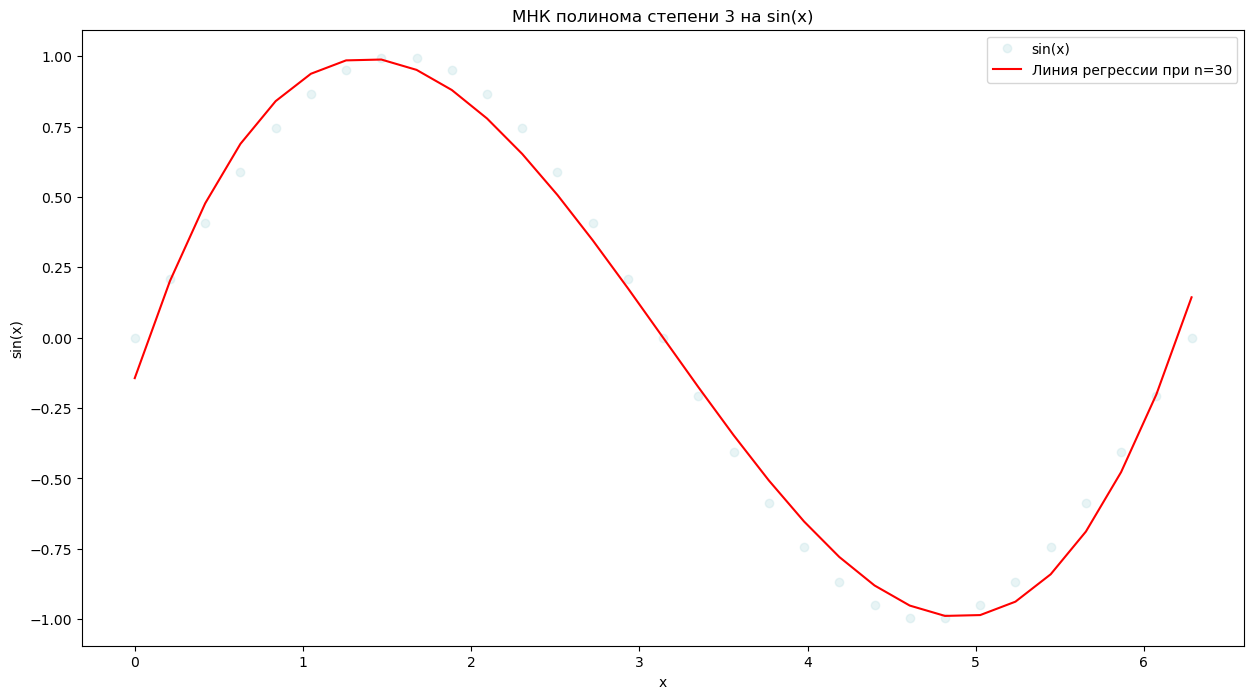

In [557]:
# МНК полинома степенью n
n = 3
w = get_all_coef(X_sin, Y_sin, n)

y_approx_sin = sum(w[i] * (X_sin ** i) for i in range(n + 1))

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(X_sin, Y_sin, "o", alpha=0.4, color="#c6e4e7", label="sin(x)")
ax.plot(X_sin, y_approx_sin, color="red", label="Линия регрессии при n=30")

ax.set_ylabel("sin(x)")
ax.set_xlabel("x")
ax.set_title("МНК полинома степени 3 на sin(x)")
ax.legend()
plt.show()

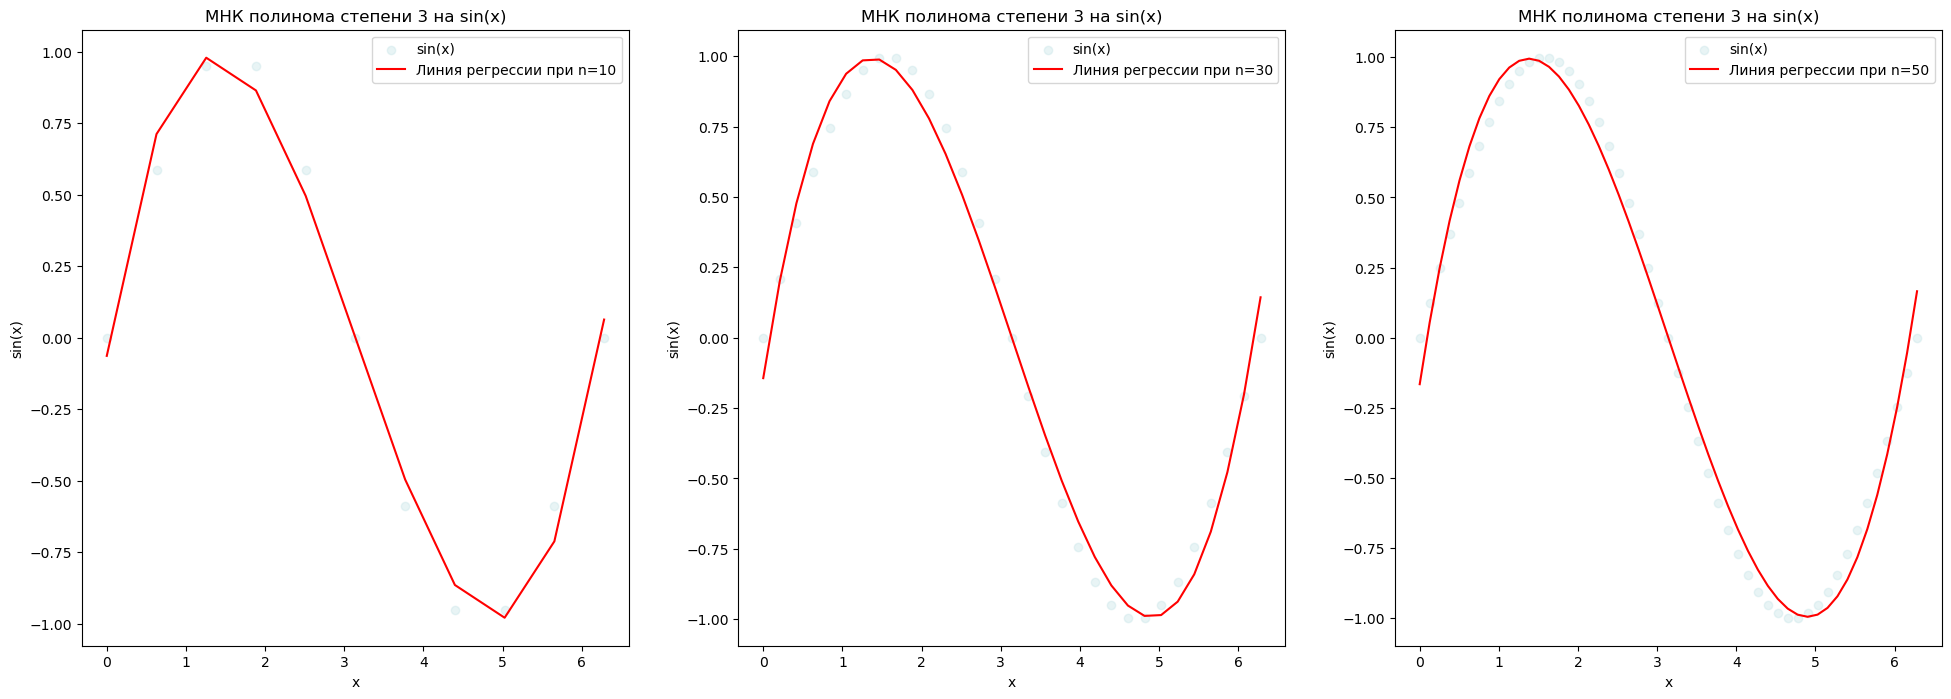

In [558]:
fig, ax = plt.subplots(figsize=(24, 8), nrows=1, ncols=3)
nodes = [11, 31, 51]
n = 3
for node in nodes:
    cell = nodes.index(node)
    X_sin = np.linspace(0, 2* np.pi, node)
    Y_sin = np.sin(X_sin)
    w = get_all_coef(X_sin, Y_sin, n)
    y_approx_sin = sum(w[i] * (X_sin ** i) for i in range(n + 1))  

    ax[cell].scatter(X_sin, Y_sin, alpha=0.4, color="#c6e4e7", label="sin(x)")
    ax[cell].plot(X_sin, y_approx_sin, color="red", label=f"Линия регрессии при n={node-1}")

    ax[cell].set_ylabel("sin(x)")
    ax[cell].set_xlabel("x")
    ax[cell].set_title("МНК полинома степени 3 на sin(x)")
    ax[cell].legend()
    
plt.show()

## МНК для зашумленных данных

Добавим зашумленных данных:

In [559]:
df_noisy = df_smooth.copy()
df_noisy.loc[10] = [145.1, 66.7]
df_noisy.loc[12] = [110.2,68.5]
df_noisy.loc[11] = [115,69.3]

# df_noisy.drop(index=0, axis=0, inplace=True)
df_noisy.reset_index(drop=True, inplace=True)

Y_noisy = df_noisy["Weight(Pounds)"]    
X_noisy = df_noisy["Height(Inches)"]


display(df_noisy)

,Weight(Pounds),Height(Inches)
0,106.318481,66.639238
1,116.013950,67.518691
2,121.735900,67.053793
3,125.214620,67.384825
4,128.716470,67.370221
5,130.904120,68.230300
6,134.829320,69.457822
7,138.760920,69.630310
8,141.664230,68.928008
9,147.933160,69.197358


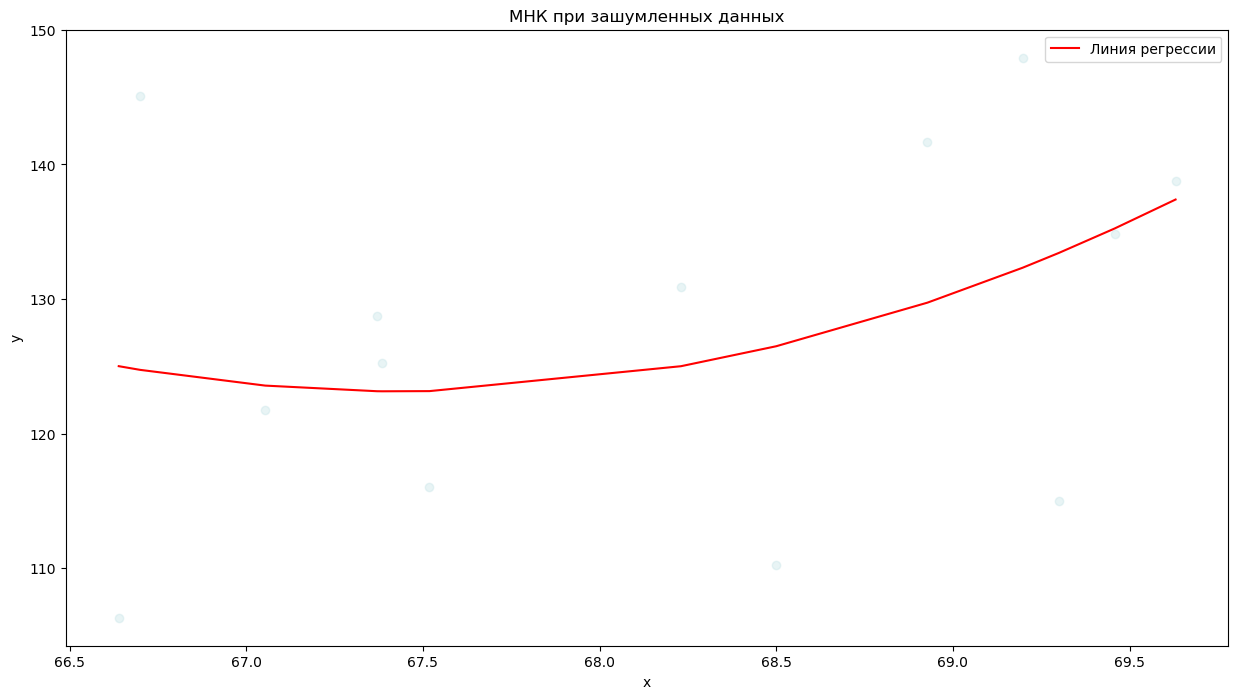

In [560]:

n = 2
w = get_all_coef(X_noisy, Y_noisy, n)

y_approx_noisy = sum(w[i] * (X_noisy ** i) for i in range(n + 1))
points_approx = dict(zip(X_noisy, y_approx_noisy))
points_approx = dict(sorted(points_approx.items()))

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(X_noisy, Y_noisy, "o", alpha=0.4, color="#c6e4e7")
ax.plot(points_approx.keys(), points_approx.values(), color="red", label="Линия регрессии")

ax.set_ylabel("y")
ax.set_xlabel("x")
ax.set_title("МНК при зашумленных данных")
ax.legend()
plt.show()

Зададим веса:

In [561]:
df_noisy["w"] = [0.1, 0.9, 0.8, 0.85, 0.78, 1.5, 0.9, 0.8, 1.2, 1.1, 0.1, 0.1, 0.1]
weights = df_noisy["w"]
display(df_noisy)

,Weight(Pounds),Height(Inches),w
0,106.318481,66.639238,0.10
1,116.013950,67.518691,0.90
2,121.735900,67.053793,0.80
3,125.214620,67.384825,0.85
4,128.716470,67.370221,0.78
5,130.904120,68.230300,1.50
6,134.829320,69.457822,0.90
7,138.760920,69.630310,0.80
8,141.664230,68.928008,1.20
9,147.933160,69.197358,1.10


In [562]:
def get_all_coef_noised(x, y, n, weights):
    size = len(x)
    A = np.empty((n + 1, n + 1))
    
    for i in range(n + 1):
        for j in range(n + 1):
            A[i, j] = sum(weights[k] * (x[k] ** (i + j)) for k in range(size))
    
    A_inv = np.linalg.inv(A)
    
    B = np.empty(n + 1)
    for i in range(n + 1):
        B[i] = sum(weights[k] * (x[k] ** i) * y[k] for k in range(size))
    
    ww = A_inv @ B
    
    return ww 

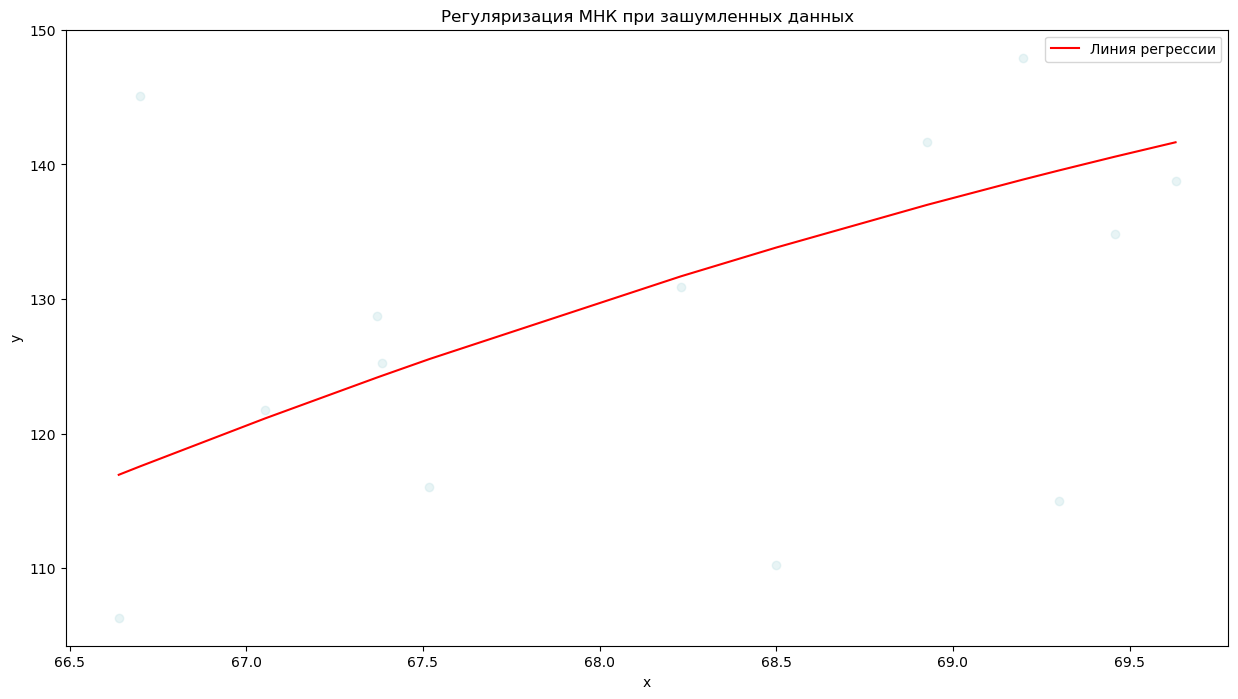

In [563]:
n = 2
w = get_all_coef_noised(X_noisy, Y_noisy, n, weights)

y_approx_noisy = sum(w[i] * (X_noisy ** i) for i in range(n + 1))
points_approx = dict(zip(X_noisy, y_approx_noisy))
points_approx = dict(sorted(points_approx.items()))

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(X_noisy, Y_noisy, "o", alpha=0.4, color="#c6e4e7")
ax.plot(points_approx.keys(), points_approx.values(), color="red", label="Линия регрессии")

ax.set_ylabel("y")
ax.set_xlabel("x")
ax.set_title("Регуляризация МНК при зашумленных данных")
ax.legend()
plt.show()

## Тест на сходимость